In [2561]:
import copy
import numpy as np
import pandas as pd
import sklearn as skl
import xgboost as xgb

In [2562]:
len(dfa)

1460

In [2563]:
dfa = pd.read_csv('data/train.csv', index_col=0)
numericals=dfa.select_dtypes(include=['float','int']).columns.values
categoricals=dfa.select_dtypes(include=['object']).columns.values
print(categoricals, numericals)

smpl_cnt = len(dfa)
np.random.seed(4)
train_idx = np.random.choice(range(1, smpl_cnt), int(smpl_cnt*0.7), replace=False)
vld_idx = list(set(range(1, smpl_cnt)).difference(train_idx))
df = dfa.iloc[train_idx]
dfv = dfa.iloc[vld_idx]  
print(dfa.shape, df.shape, dfv.shape)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition'] ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'M

# encode categorical data

In [2564]:
dfe=copy.deepcopy(df) 
cat_encoder=dict()

In [2565]:
ecocde = {'RL': 0, 'FV':1, 'RM':2, 'RH':3, 'C (all)':4}
itm='MSZoning'
#dfe[itm] = dfe[itm].map(ecocde)

cat_encoder[itm] = ecocde

In [2566]:
itm='Street'
dfe[itm].fillna(0, inplace=True)
ecocde = {'Pave': 0, 'Grvl':1}
cat_encoder[itm] = ecocde


In [2567]:
itm='Alley'
ecocde = {np.nan: 0, 'Pave': 1, 'Grvl':2}
cat_encoder[itm] = ecocde

In [2568]:
itm='LotShape'
ecocde = {'Reg': 0, 'IR1': 1, 'IR2':2, 'IR3':3}
cat_encoder[itm] = ecocde

In [2569]:
itm='LandContour'
ecocde = {'Low': 0, 'Lvl': 1, 'Bnk':2, 'HLS':3}
cat_encoder[itm] = ecocde

In [2570]:
# we may want to remove this feature
itm='Utilities'
ecocde = {'AllPub': 0, 'NoSeWa': 1}
cat_encoder[itm] = ecocde

In [2571]:
itm='LotConfig'
ecocde = {'Inside': 0, 'CulDSac': 1, 'Corner':2, 'FR2':3, 'FR3':4}
cat_encoder[itm] = ecocde

In [2572]:
itm='LandSlope'
ecocde = {'Gtl': 0, 'Mod': 1, 'Sev':2}
cat_encoder[itm] = ecocde

In [2573]:
itm='Neighborhood'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode

In [2574]:
itm='Condition1'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode

itm='Condition2'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode



In [2575]:
itm='BldgType'
ecocde = {'Twnhs': 0, 'TwnhsE': 1, 'Duplex':2, '2fmCon':3, '1Fam':4}
cat_encoder[itm] = ecocde

In [2576]:
itm='HouseStyle'
mn=df['SalePrice'].median()
encode=(df.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode

In [2577]:
itm='RoofStyle'
ecocde = {'Gable': 0, 'Hip': 1, 'Flat':3, 'Gambrel':4, 'Mansard':5,'Shed':6}
cat_encoder[itm] = ecocde

In [2578]:
itm='Exterior1st'
mn=df['SalePrice'].median()
encode=(df.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode

itm='Exterior2nd'
mn=df['SalePrice'].median()
encode=(df.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode


In [2579]:
itm='MasVnrType'
ecocde = {'None': 0, np.nan: 0, 'BrkCmn':1, 'BrkFace':2, 'Stone':3}
cat_encoder[itm] = ecocde

In [2580]:
itm='ExterQual'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2}
cat_encoder[itm] = ecocde

In [2581]:
itm='ExterCond'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2}
cat_encoder[itm] = ecocde

In [2582]:
itm='Foundation'
ecocde = {'Wood': -2, 'BrkTil': -1, 'Slab':0, 'Stone':1, 'CBlock':2, 'PConc':3}
cat_encoder[itm] = ecocde

In [2583]:
itm='BsmtQual'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2, np.nan:0}
cat_encoder[itm] = ecocde

In [2584]:
itm='BsmtCond'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2, np.nan:0}
cat_encoder[itm] = ecocde

In [2585]:
itm='BsmtExposure'
ecocde = {'No': 1, 'Mn': 1, 'Av':2, 'Gd':3, np.nan:0}
cat_encoder[itm] = ecocde

In [2586]:
for itm in ['BsmtFinType1', 'BsmtFinType2']:
    ecocde = {'Unf':0, 'LwQ': 1, 'Rec': 2, 'BLQ':3, 'ALQ':4, 'GLQ':5}
    cat_encoder[itm] = ecocde

In [2587]:
itm='HeatingQC'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2}
cat_encoder[itm] = ecocde

In [2588]:
itm='CentralAir'
ecocde = {'N': 0, 'Y':1}
cat_encoder[itm] = ecocde

In [2589]:
itm='Electrical'
ecocde = {'Mix': -2, 'FuseP':-1, 'FuseF':0, 'FuseA':1, 'SBrkr':2, np.nan:0}
cat_encoder[itm] = ecocde

In [2590]:
itm='KitchenQual'
ecocde = {'Po': -2, 'Fa': -1, 'TA':0, 'Gd':1, 'Ex':2, np.nan:0}
cat_encoder[itm] = ecocde

In [2591]:
itm='Functional'
ecocde = {'Typ': 0, 'Min1': -1, 'Min2':-2, 'Mod':-3, 'Maj1':-4, 'Maj2':-5, 'Sev':-6, 'Sal':-7}
cat_encoder[itm] = ecocde

In [2592]:
itm='FireplaceQu'
ecocde = {'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5, np.nan:0}
cat_encoder[itm] = ecocde

In [2593]:
itm='GarageType'
mn=df['SalePrice'].median()
encode=(df.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:1})
cat_encoder[itm] = encode

In [2594]:
itm='GarageFinish'
ecocde = {np.nan:0, 'Unf': 1, 'RFn': 2, 'Fin':3 }
cat_encoder[itm] = ecocde

In [2595]:
itm='GarageQual'
ecocde = {'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5, np.nan:0}
cat_encoder[itm] = ecocde


In [2596]:
itm='GarageCond'
ecocde = {'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5, np.nan:0}
cat_encoder[itm] = ecocde

In [2597]:
itm='PavedDrive'
ecocde = {'N': 0, 'P': 1, 'Y':2}
cat_encoder[itm] = ecocde

In [2598]:
itm='PoolQC'
ecocde = {'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5, np.nan:0}
cat_encoder[itm] = ecocde

In [2599]:
itm='Fence'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:0})
cat_encoder[itm] = encode

In [2600]:
itm='MiscFeature'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:0})
cat_encoder[itm] = encode

In [2601]:
itm='SaleType'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:0})
cat_encoder[itm] = encode

In [2602]:
itm='SaleCondition'
mn=dfe['SalePrice'].median()
encode=(dfe.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:0})
cat_encoder[itm] = encode

In [2603]:
itm='RoofMatl'
mn=df['SalePrice'].median()
encode=(df.groupby(itm)['SalePrice'].median()-mn).to_dict()
encode.update({np.nan:0})
cat_encoder[itm] = encode

In [2604]:
#%pdb
len(cat_encoder)

for itm, ecd in cat_encoder.items():
    dfa[itm].replace(ecd, inplace=True)

# some categorical values did not show up in training set.
dfa.replace({r'\.*':0, '\n':0, 'AsphShn':0, 'RRNe':0, 'PosA':0, 'RRAn':0}, inplace=True, regex=True)

dfa['Condition'] = dfa['Condition1'] + dfa['Condition2'] 
dfa['Exterior'] = dfa['Exterior1st'] + dfa['Exterior2nd']
dfa['BsmtFin'] = (dfa['BsmtFinType1']*dfa['BsmtFinSF1'] + dfa['BsmtFinType2']*dfa['BsmtFinSF2'])/dfa['TotalBsmtSF']

dfa.drop(['Heating', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd','BsmtFinType1', 'BsmtFinType2','BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)
    

In [2605]:
dfa.select_dtypes(include=['object']).columns.values


array([], dtype=object)

# Normalize the scale of data

In [2606]:
SalePrice=dfa['SalePrice']  
sp_mad = SalePrice.mad()
sp_med = SalePrice.median()  # so that the normalization can be reversed

dfn=copy.deepcopy(dfa)
#dfn = (dfn-dfn.median())/dfn.mad()
dfn.fillna(0, inplace=True)
df = dfn.loc[train_idx]
dfv = dfn.loc[vld_idx]  
print(dfa.shape, df.shape, dfv.shape)
dfn.head()


(1460, 74) (1021, 74) (438, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Condition,Exterior,BsmtFin
Id,,,,,,,,,,,,,,,,,,,,,
1,60,0,65.0,8450,0,0,0,1,0,0,...,0.0,0,2,2008,-4100.0,-2053.0,208500,3250.0,74800.0,4.123832
2,20,0,80.0,9600,0,0,0,1,0,3,...,0.0,0,5,2007,-4100.0,-2053.0,181500,-22500.0,-52040.0,3.099842
3,60,0,68.0,11250,0,0,1,1,0,0,...,0.0,0,9,2008,-4100.0,-2053.0,223500,3250.0,74800.0,2.641304
4,70,0,60.0,9550,0,0,1,1,0,2,...,0.0,0,2,2006,-4100.0,-31000.0,140000,3250.0,-52500.0,1.142857
5,60,0,84.0,14260,0,0,1,1,0,3,...,0.0,0,12,2008,-4100.0,-2053.0,250000,3250.0,74800.0,2.860262


from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(np.log10(1+np.abs(dfn)))
plt.show()

# build and fit the model

In [2607]:
target='SalePrice'
features=list(set(df.columns).difference(['SalePrice']))


In [2613]:
mdl = xgb.XGBRegressor(max_depth=3, learning_rate=0.001, n_estimators=10000, silent=True, objective='reg:linear', nthread=2, gamma=0.0001, min_child_weight=2, max_delta_step=0, subsample=1, colsample_bytree=0.8, colsample_bylevel=0.5, reg_alpha=0, reg_lambda=3, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
mdl.fit(df[features], df[target])

XGBRegressor(base_score=0.5, colsample_bylevel=0.5, colsample_bytree=0.8,
       gamma=0.0001, learning_rate=0.001, max_delta_step=0, max_depth=3,
       min_child_weight=2, missing=None, n_estimators=10000, nthread=2,
       objective='reg:linear', reg_alpha=0, reg_lambda=3,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [2614]:
print(mdl)
prd=mdl.predict(df[features])
cr = np.corrcoef(prd, df[target].values)[0,1]
#prd = (prd*sp_mad)+sp_med
rmse = np.sqrt(skl.metrics.mean_squared_error(np.log(SalePrice.loc[train_idx]), np.log(prd)))
mae = skl.metrics.mean_absolute_error(SalePrice.loc[train_idx], prd)
print('train ', cr, mae, rmse, np.median(SalePrice.loc[train_idx].abs()))
#plt.scatter(prd, target.values)
#plt.show()
prd=mdl.predict(dfv[features])
cr = np.corrcoef(prd, dfv[target].values)[0,1]
#prd = (prd*sp_mad)+sp_med
rmse = np.sqrt(skl.metrics.mean_squared_error(np.log(SalePrice.loc[vld_idx]), np.log(prd)))
mae = skl.metrics.mean_absolute_error(SalePrice.loc[vld_idx], prd)
print('valid ', cr, mae, rmse, np.median(SalePrice.loc[vld_idx].abs()))


XGBRegressor(base_score=0.5, colsample_bylevel=0.5, colsample_bytree=0.8,
       gamma=0.0001, learning_rate=0.001, max_delta_step=0, max_depth=3,
       min_child_weight=2, missing=None, n_estimators=10000, nthread=2,
       objective='reg:linear', reg_alpha=0, reg_lambda=3,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
train  0.983493503028 10278.9987451 0.0868831071143 165000.0
valid  0.929098152958 16103.250544 0.130678908818 157200.0


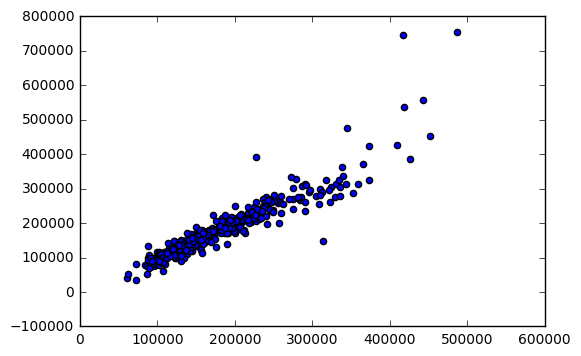

In [2610]:
plt.scatter(prd, SalePrice.loc[vld_idx])
plt.show()

In [2611]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Condition,Exterior,BsmtFin
Id,,,,,,,,,,,,,,,,,,,,,
281,60,0,82.0,11287,0,0,0,1,0,0,...,0.0,0,1,2007,-4100.0,-2053.0,228500,3250.0,7650.0,2.608426
1365,160,1,30.0,3180,0,1,0,1,0,0,...,0.0,0,4,2006,-4100.0,-31000.0,144152,3250.0,-52040.0,0.000000
133,20,0,75.0,7388,0,0,0,1,0,2,...,0.0,0,7,2007,-4100.0,-2053.0,150750,3250.0,-52040.0,0.761994
358,120,2,44.0,4224,0,0,0,1,0,0,...,0.0,0,8,2007,-4100.0,-2053.0,134000,3250.0,172000.0,3.061296
439,30,0,40.0,4280,0,0,0,1,0,0,...,0.0,0,3,2007,-4100.0,-2053.0,90350,3250.0,-56500.0,0.829545


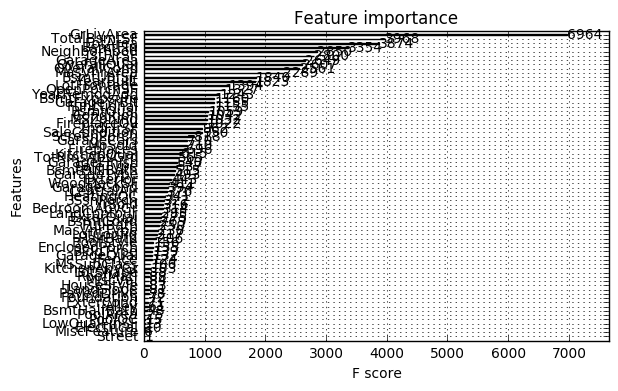

In [2612]:
xgb.plot_importance(mdl); plt.show()